In [19]:
import os
import struct


class Image:
    def __init__(self, dir='./'):
        self.train_files = {
                'images': os.path.join(dir, 'train-images-idx3-ubyte'),
                'labels': os.path.join(dir, 'train-labels-idx1-ubyte')
                }
        self.test_files = {
                'images': os.path.join(dir, 't10k-images-idx3-ubyte'),
                'labels': os.path.join(dir, 't10k-labels-idx1-ubyte')
                }

    @property
    def train(self):
        path = self.train_files
        return self._get_dataset(path)

    @property
    def test(self):
        path = self.test_files
        return self._get_dataset(path)

    def _get_dataset(self, path):
        images = self._load_images(path['images'])
        labels = self._load_labels(path['labels'])
        for image, label in zip(images, labels):
            yield image, label

    def _load_images(self, fname):
        f = open(fname, 'rb')
        header = struct.unpack('>4i', f.read(16))
        magic, size, width, height = header

        if magic != 2051:
            raise RuntimeError("'%s' is not an MNIST image set." % fname)

        chunk = width * height
        for _ in range(size):
            img = struct.unpack('>%dB' % chunk, f.read(chunk))
            yield img, width, height

        f.close()

    def _load_labels(self, fname):
        f = open(fname, 'rb')
        header = struct.unpack('>2i', f.read(8))
        magic, size = header

        if magic != 2049:
            raise RuntimeError("'%s' is not an MNIST label set." % fname)

        for label in struct.unpack('>%dB' % size, f.read()):
            yield label

        f.close()


def return_data_set(name):

        dataset = Image(name)
        img_train_list = []
        label_train_list = []
        for (img, width, height), label in dataset.train:

            img_train_list.append(img)
            label_train_list.append(label)


        img_test_list = []
        label_test_list = []
        for (img, width, height), label in dataset.test:


            img_test_list.append(img)
            label_test_list.append(label)

        return (img_train_list,label_train_list,img_test_list,label_test_list)

In [20]:
img_train_list,label_train_list,img_test_list,label_test_list = return_data_set('samples')

In [21]:
import matplotlib.pyplot as plt
import numpy as np

images_train = np.array(img_train_list)
labels_train = np.array(label_train_list)
images_test = np.array(img_test_list)
labels_test = np.array(label_test_list)

ValueError: num must be 1 <= num <= 12, not 0

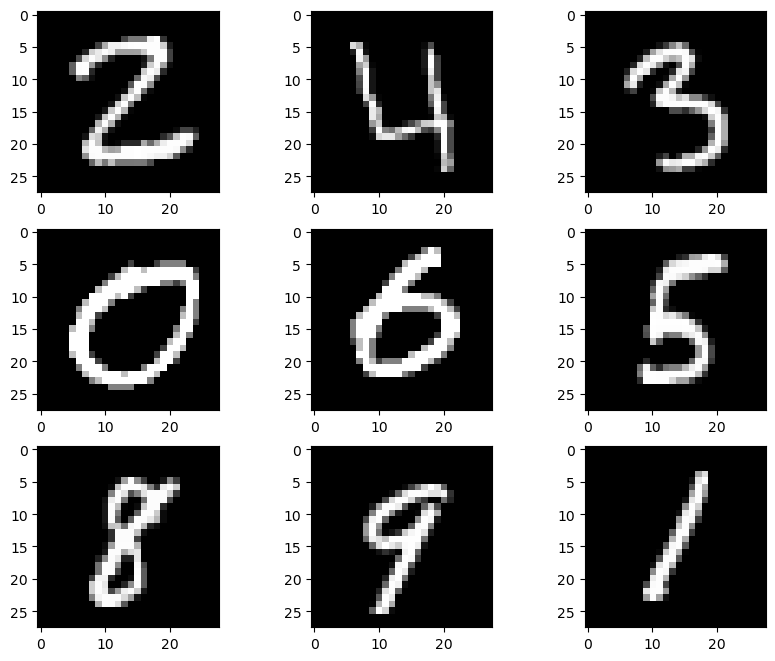

In [22]:
from random import randrange

number_see = []
plt.figure(figsize=(10,8))
i = 0
while i < 10:
    index = randrange(0, len(images_train))  # choose an index ;-)
    if labels_train[index] in number_see:
        pass
    else :
        plt.subplot(330 + 1 + i)
        number_see.append(labels_train[index])
        one_date = images_train[index]
        image = one_date.reshape(28,28)
        i+= 1
        plt.imshow(image,cmap=plt.get_cmap('gray'))
plt.show()
